In [44]:
import pandas as pd
data = pd.read_csv("instagram_reach.csv")
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [45]:
# Remove "hours" from the values
data['Time since posted'] = data['Time since posted'].str[:-6]

# Convert the values to float
data['Time since posted'] = data['Time since posted'].astype('int')

data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    int64 
 7   Likes              100 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


Now let’s import some other Python libraries and prepare a function to examine the word cloud to understand the maximum type of words used in Instagram captions and hashtags:

/tmp/ipykernel_24142/1648416788.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykernel_24142/1648416788.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


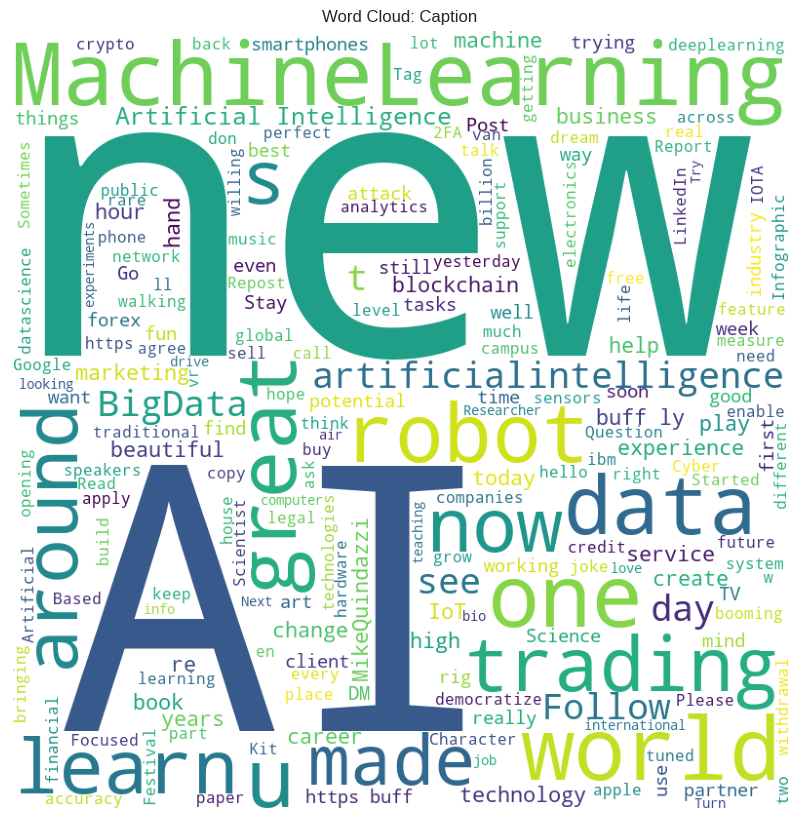

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add('will')
import re
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')

def WordCloudPlotter(dfColumn):
    colData = data[dfColumn]
    textCloud = ''

    # text processing
    # converting columns to a
    # single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)

    # plotting word cloud
    wordcloud = WordCloud(width=800,height=800,background_color='white',stopwords=stopwords,
                          min_font_size=10).generate(textCloud)
    plt.figure(figsize=(8,8), facecolor=None)
    plt.style.use('seaborn-whitegrid')
    plt.imshow(wordcloud)
    plt.rcParams.update({'font.size':25})
    plt.axis("off")
    plt.title('Word Cloud: '+str(dfColumn))
    plt.tight_layout(pad=0)

    plt.show()

WordCloudPlotter('Caption')

/tmp/ipykernel_24142/1648416788.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


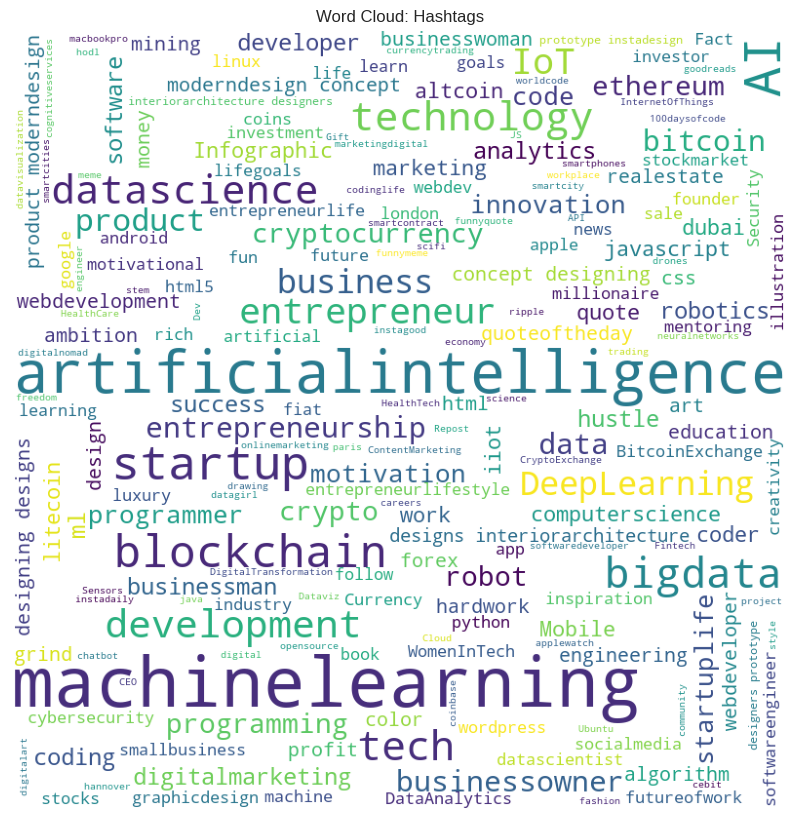

In [48]:
WordCloudPlotter('Hashtags')

Now let’s understand the number of likes we get based on the number of followers we have and the time elapsed since our post:

/tmp/ipykernel_24142/623199222.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykernel_24142/623199222.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


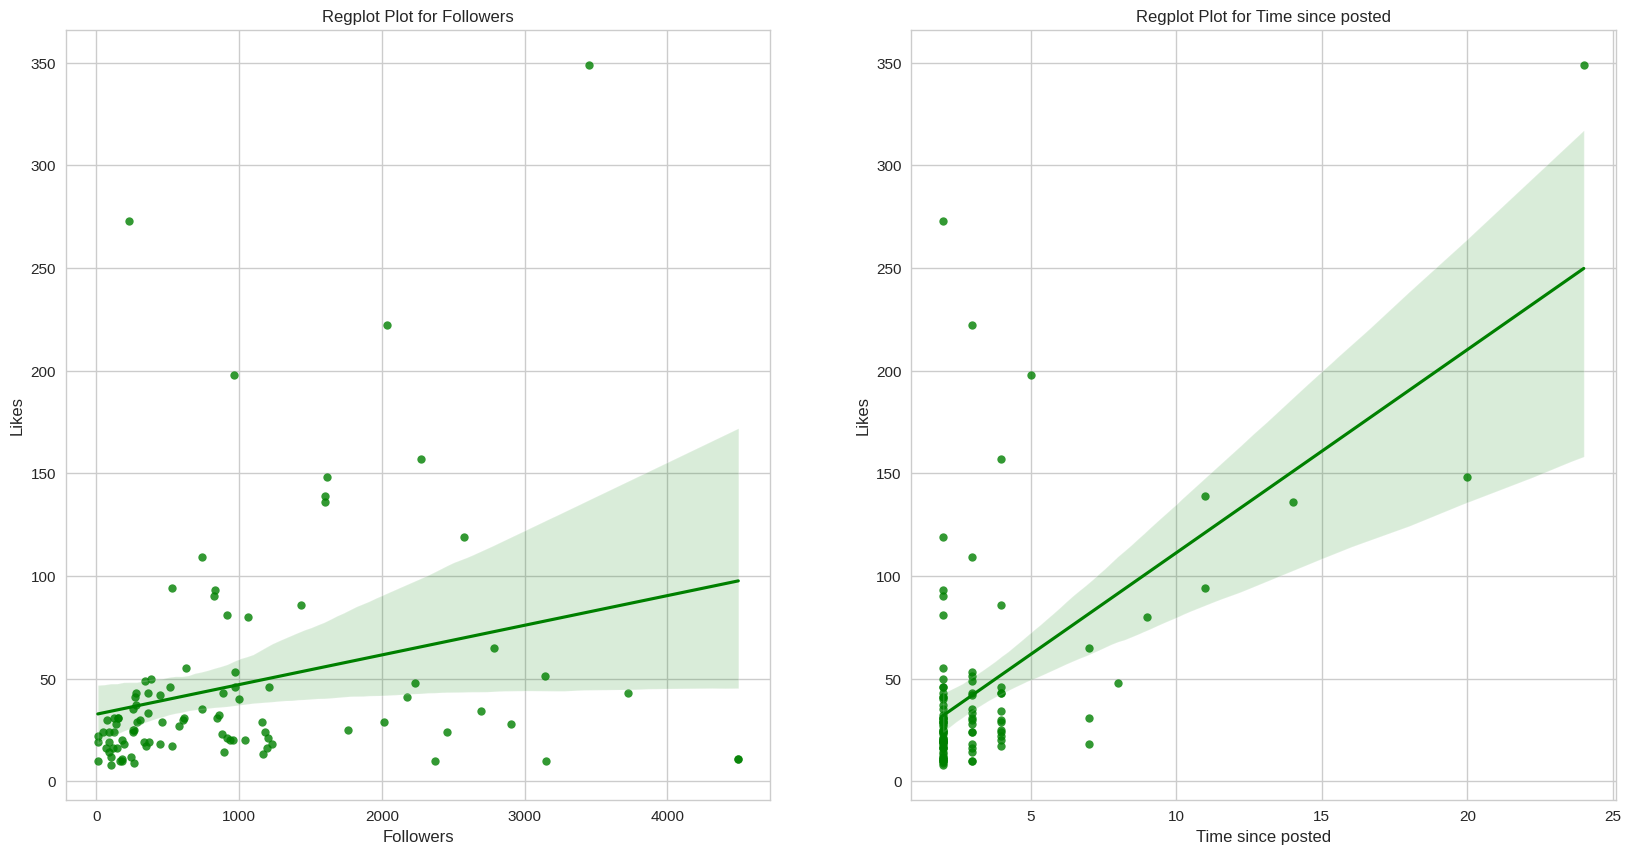

In [49]:
def PlotData(features):
    plt.figure(figsize= (20, 10))    
    pltNum = 1
    for mem in features:
        plt.subplot(1, 2 , pltNum)
        plt.style.use('seaborn-whitegrid')
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sns.regplot(data = data, x = mem, y = 'Likes' , color = 'green')
        pltNum += 1

    plt.show()

PlotData(['Followers', 'Time since posted'])

Now I’m going to train a simple model to predict the target value which is “likes” with the combination of followers and time since post:

In [50]:
import numpy as np
features = np.array(data[['Followers','Time since posted']], dtype='float32')
targets = np.array(data['Likes'],dtype='float32')
maxValLikes = max(targets)
print("Max value of target is {}".format(maxValLikes))

Max value of target is 349.0


Now let’s train the Instagram algorithm with Python:

In [51]:

targets = targets/maxValLikes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.1, random_state = 32)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(X_train)
xTest = stdSc.transform(X_test)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

/tmp/ipykernel_24142/3914222335.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


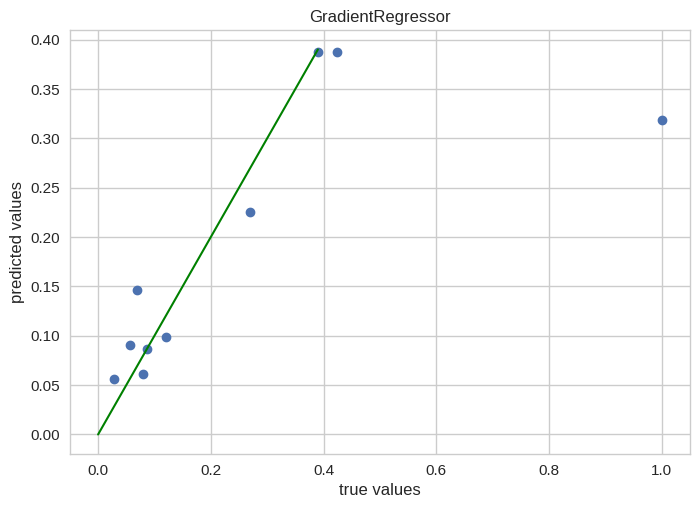

In [52]:
predictions = gbr.predict(X_test)
plt.scatter(y_test, predictions)
plt.style.use('seaborn-whitegrid')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

So the machine learning model above looks good, now let’s implement it by framing the realtime cases:

/tmp/ipykernel_24142/3713638829.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


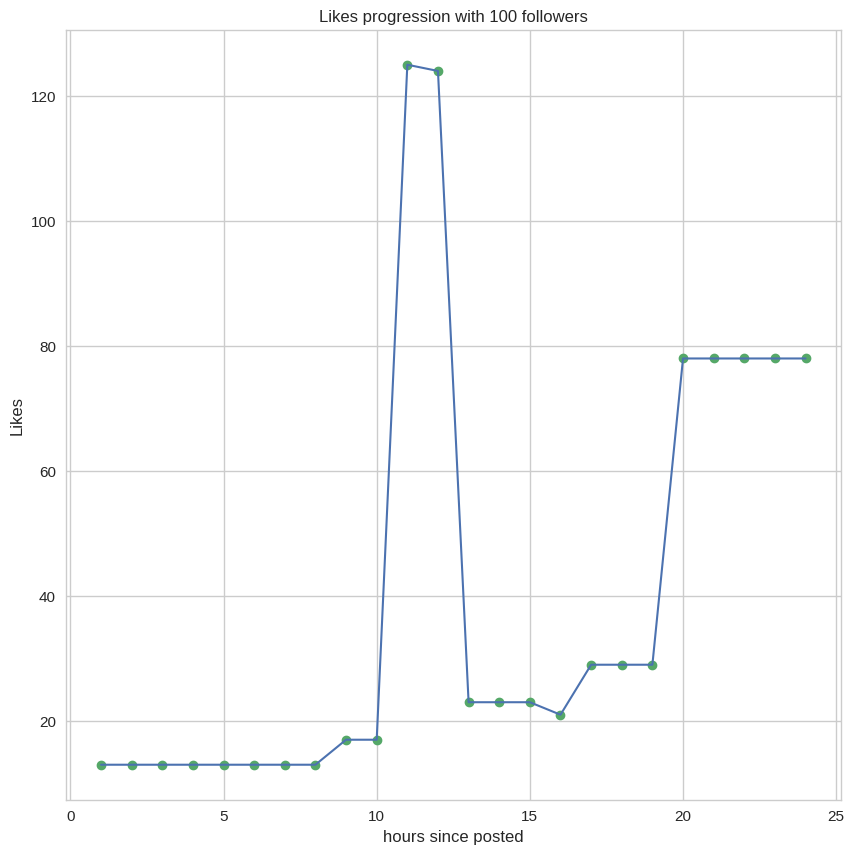

In [53]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.style.use('seaborn-whitegrid')
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()
    
PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)

/tmp/ipykernel_24142/3713638829.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


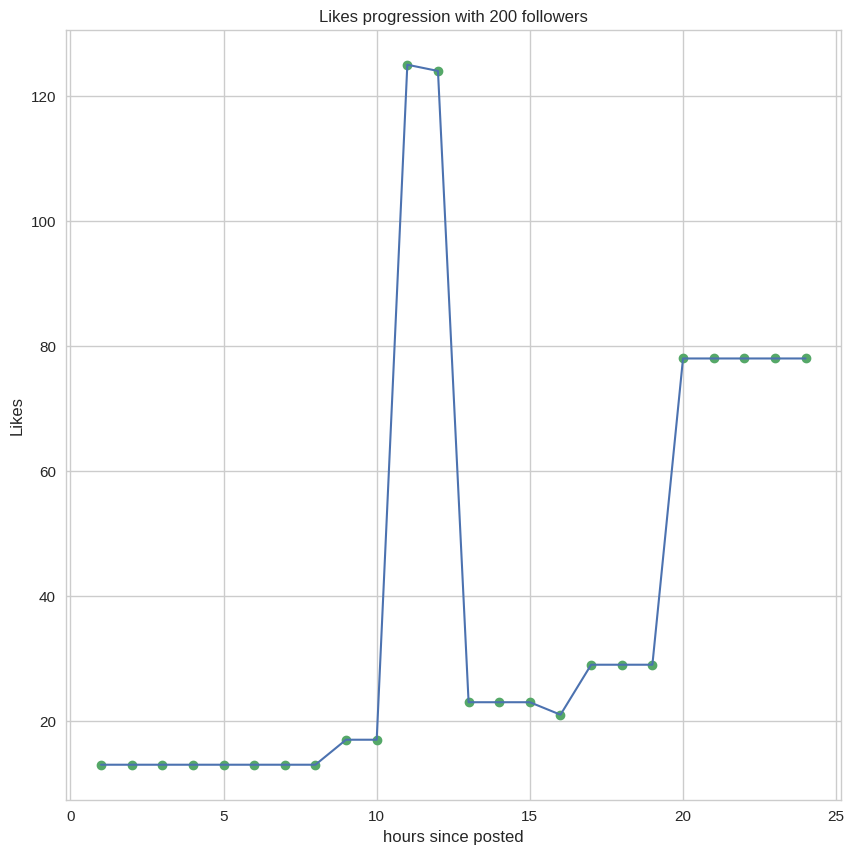

In [54]:
# likes progression for 200 followers
PredictionsWithConstantFollowers(gbr, 200, stdSc, maxValLikes)

/tmp/ipykernel_24142/3713638829.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


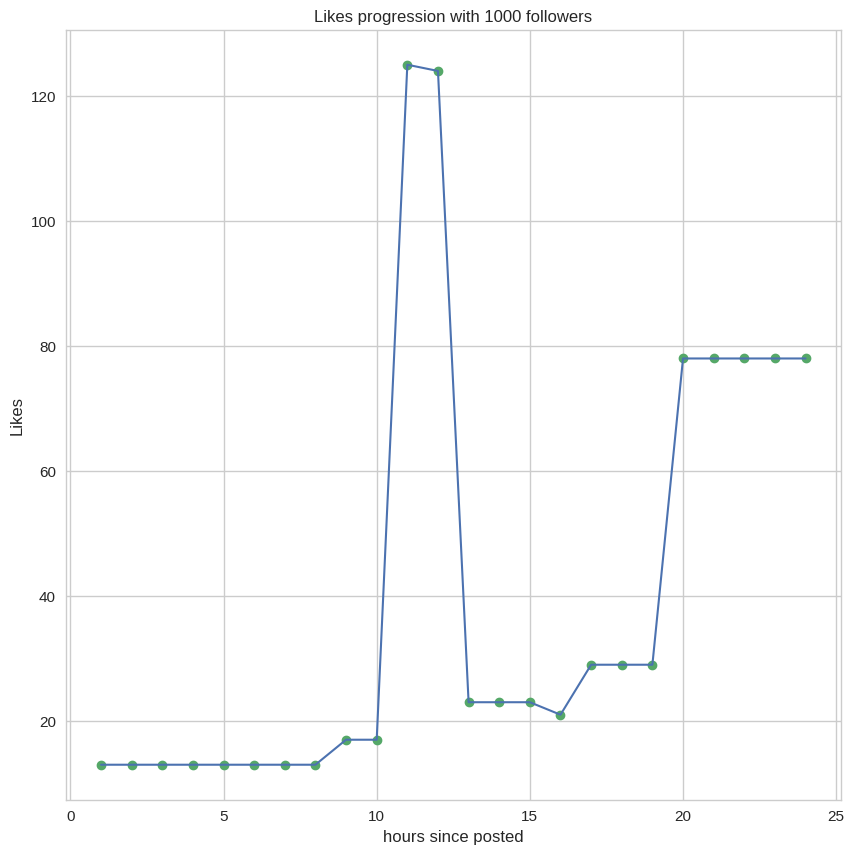

In [55]:
# likes progression for 1000 followers
PredictionsWithConstantFollowers(gbr, 1000, stdSc, maxValLikes)

Source:

https://thecleverprogrammer.com/2021/01/26/instagram-algorithm-with-machine-learning/